## Constituency Parsing

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/constituency](https://github.com/huseinzol05/Malaya/tree/master/example/constituency).
    
</div>

<div class="alert alert-warning">

This module only trained on standard language structure, so it is not save to use it for local language structure.
    
</div>

In [1]:
%%time

import malaya

CPU times: user 2.83 s, sys: 3.71 s, total: 6.54 s
Wall time: 2.13 s


/home/husein/dev/malaya/malaya/tokenizer.py:214: FutureWarning: Possible nested set at position 3397
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))
/home/husein/dev/malaya/malaya/tokenizer.py:214: FutureWarning: Possible nested set at position 3927
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))


### what is constituency parsing

Assign a sentence into its own syntactic structure, defined by certain standardization. For example,

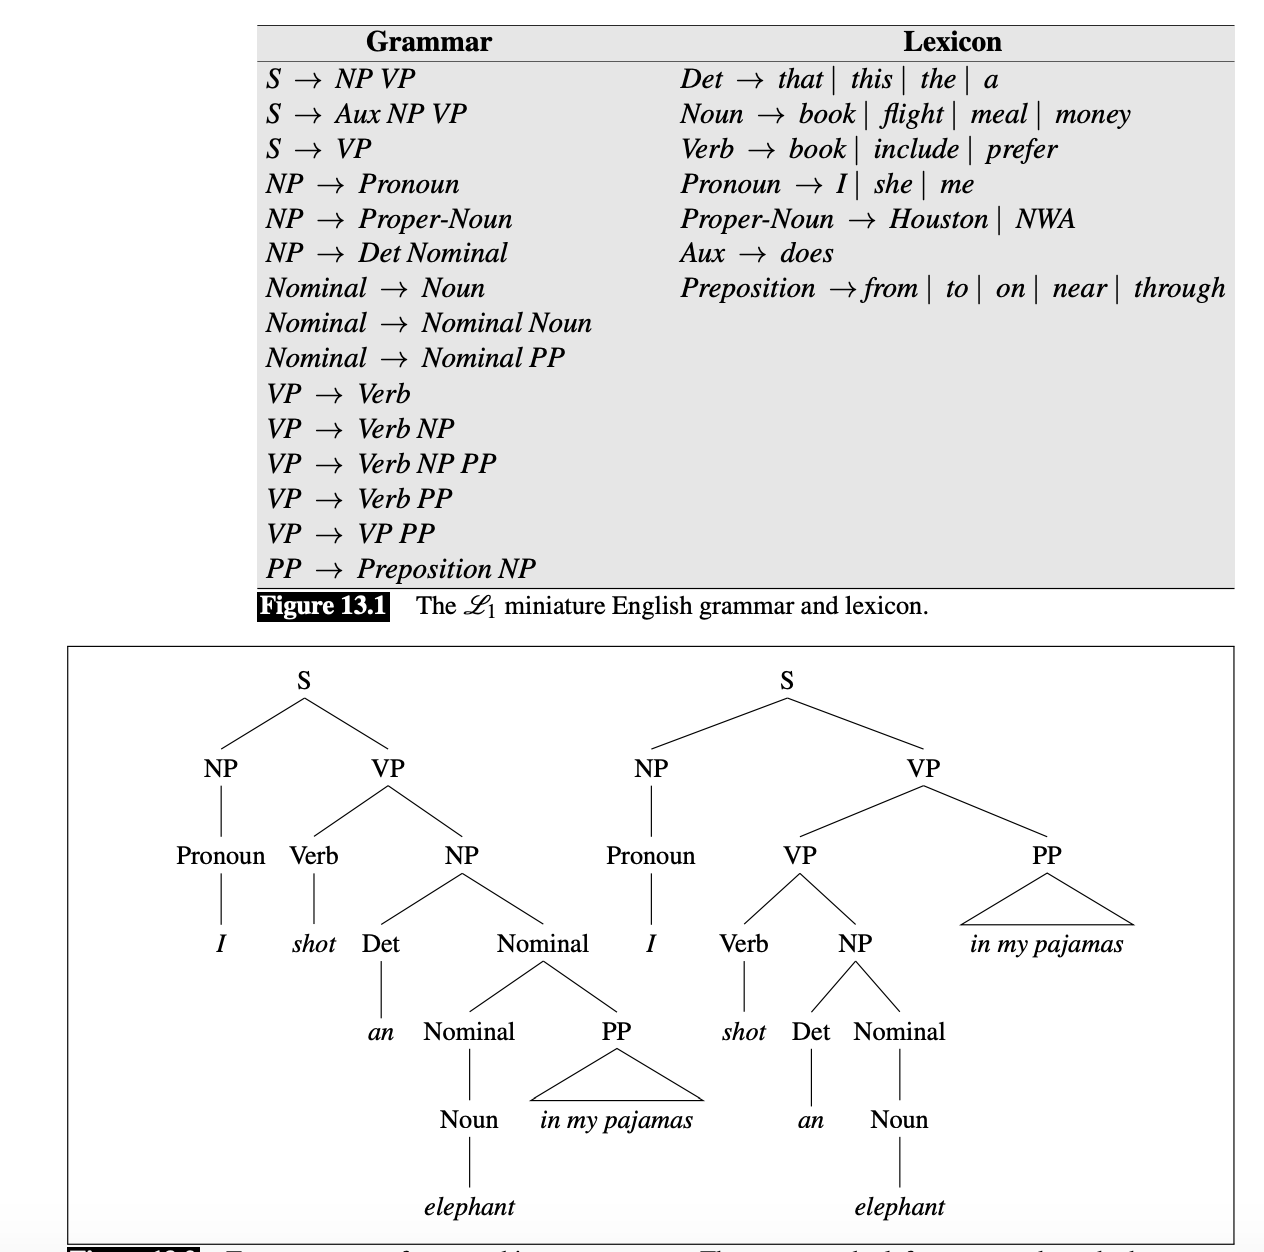

In [2]:
from IPython.core.display import Image, display

display(Image('constituency.png', width=500))

Read more at Stanford notes, https://web.stanford.edu/~jurafsky/slp3/13.pdf

The context free grammar totally depends on language, so for Bahasa, we follow https://github.com/aisingapore/seacorenlp-data/tree/main/id/constituency

### List available HuggingFace Constituency models

In [2]:
malaya.constituency.available_huggingface

{'mesolitica/constituency-parsing-t5-small-standard-bahasa-cased': {'Size (MB)': 247,
  'Recall': 81.62,
  'Precision': 83.32,
  'FScore': 82.46,
  'CompleteMatch': 22.4,
  'TaggingAccuracy': 94.95},
 'mesolitica/constituency-parsing-t5-base-standard-bahasa-cased': {'Size (MB)': 545,
  'Recall': 82.23,
  'Precision': 82.12,
  'FScore': 82.18,
  'CompleteMatch': 23.5,
  'TaggingAccuracy': 94.69}}

In [3]:
malaya.constituency.info

'Tested on https://github.com/aisingapore/seacorenlp-data/tree/main/id/constituency test set.'

In [4]:
string = 'Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar sekiranya mengantuk ketika memandu.'

### Load HuggingFace model

```python
def huggingface(
    model: str = 'mesolitica/constituency-parsing-t5-small-standard-bahasa-cased',
    force_check: bool = True,
    **kwargs,
):
    """
    Load HuggingFace model to Constituency parsing.

    Parameters
    ----------
    model: str, optional (default='mesolitica/constituency-parsing-t5-small-standard-bahasa-cased')
        Check available models at `malaya.constituency.available_huggingface`.
    force_check: bool, optional (default=True)
        Force check model one of malaya model.
        Set to False if you have your own huggingface model.

    Returns
    -------
    result: malaya.torch_model.huggingface.Constituency
    """
```

In [11]:
model = malaya.constituency.huggingface('mesolitica/constituency-parsing-t5-small-standard-bahasa-cased')

### Parse

```python
def predict(self, string):
    """
    Parse a string into malaya.function.constituency.trees_newline.InternalParseNode.

    Parameters
    ----------
    string : str

    Returns
    -------
    result: malaya.function.constituency.trees_newline.InternalParseNode object
    """
```

In [6]:
r = model.predict(string)

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


### Parse into NLTK Tree

Make sure you already installed `nltk`, if not, simply,

```bash
pip install nltk svgling
```

In [7]:
from nltk.tree import Tree
import svgling

In [8]:
tree = Tree.fromstring(r.convert().linearize())

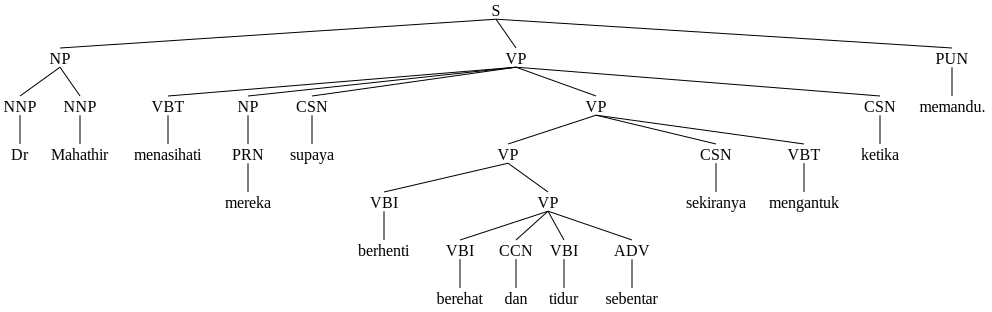

In [10]:
svgling.draw_tree(tree)